# Sankey Plots with Python
Daniel Ringler

DB Systel

## Abstract
This talk provides an introduction to Sankey plots with a focus on creating them with various Python libraries. We will talk about the pros and cons of the libraries, give practical advice on how and when to use them, and what you should regard when creating Sankey plots yourself.

## Description
Sankey plots can be seen more and more in newspapers, magazines, and dashboards (e.g. visualizing election voter flow). This talk will give an introduction about the origin of Sankey plots, how they are used and when they should be used (or should not be used!).
We will examine different Python libraries that can be used to create Sankey plots and give practical examples, show common pitfalls and compare the pros and cons of the different libraries.
In the end, we will see some good and bad examples of Sankey plots that you can use in practice.

## Duration
30 minutes

# Agenda
* What are Sankey plots?
  * History
  * How are they used?
  * How should/shouldn't they be used?
* Python libraries for Sankey plots
  * Data
  * Example Code
  * Pitfalls
  * Pros & Cons
* Takeaways
  * Good & bad examples
  * do's and don'ts

# What are Sankey plots?
* Flow diagram
* Width of flows = amount
* Named after Matthew Henry Phineas Riall Sankey
* Flow and distribution of heat in steam engines, 1898

<img width="600" src="img/sankey_diagram_1898.png"/>

<font size="1">https://upload.wikimedia.org/wikipedia/commons/1/10/JIE_Sankey_V5_Fig1.png</font>

* energy flow
* show where something goes to and comes from / Flow: From A to B

## History
* First and most famous Sankey plot: **Charles Minard's Map of Napoleon's Russian Campaign of 1812**
* Sankey diagram on map
* Created 1869
* Many data types
  * Troop number
  * Latitude & Longitude
  * Direction of travel
  * Distance
  * Temperature
  * Time

<img width="600" src="img/minard_1869.png"/>

<font size="1">https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png</font>


## How are they used?
* Energy: input, output, waste
* International Energy Agency: Flow of energy for the entire planet from 1973 to 2019
* Interactive: Show change of energy flow for selected country and years

<img width="600" src="img/world_balance_2019.png"/>

<font size="1">https://www.iea.org/sankey/#?c=World&s=Balance</font>


## How are they used?
* Eurostat: Interactive energy balance flow for EU or countries of EU from 1990 to 2020

<img width="600" src="img/eurostat_2020.png"/>

<font size="1">https://ec.europa.eu/eurostat/web/energy/energy-flow-diagrams</font>


## How are they used?
* Voter flow in elections

<img width="600" src="img/bundestagswahl.png"/>

<font size="1">https://www.tagesschau.de/inland/btw21/waehlerwanderung-bundestagswahl-103.html</font>

## How are they used?
* Voter flow in elections

<img width="600" src="img/bundestagswahl_from.png"/>

<font size="1">https://www.tagesschau.de/inland/btw21/waehlerwanderung-bundestagswahl-103.html</font>

## How are they used?
* Voter flow in elections

<img width="600" src="img/bundestagswahl_to.png"/>

<font size="1">https://www.tagesschau.de/inland/btw21/waehlerwanderung-bundestagswahl-103.html</font>

## How are they used?
* Voter flow in elections

<img width="600" src="img/economist_2019.png"/>

<font size="1">https://www.economist.com/graphic-detail/2019/11/01/a-british-election-and-other-uncertainties</font>

* What are you interested in? (Example with German election)
  * from one to multiple (where does something go?)
  * from multiple to one (where does something come from?)
* UK election:
  * More than two elections
  * You can extend the "y axis" (see also energy flow steps from import/export over transformation and transport to consumption)

## How should/shouldn't they be used?
* Show flow of different categories between two or more distributions
  * Start: Initial distribution of categories (usually the left side)
  * Flow: Redistribution from left to the right
  * End: New distribution (usually the right side)
* Width of lines represent the volume or amount
* Avoid too many categories

# Python libraries for Sankey plots

## Data
* Berlin census from https://www.statistik-berlin-brandenburg.de/a-i-3-j

<img width="600" src="img/berlin_census_table.png"/>

<font size="1">https://download.statistik-berlin-brandenburg.de/0c8e82331bc2327a/802f7f020114/SB_A01-03-00_2020j01_BE.xlsx</font>



In [211]:
data = {
    '2020': {
        'start': 3669491,
        'births': 38693,
        'immigration': 142923,
        'deaths': -37642,
        'emmigration': -144881,
        'end': -3664088
    }
}

flows = list(data['2020'].values())
labels = list(data['2020'].keys())

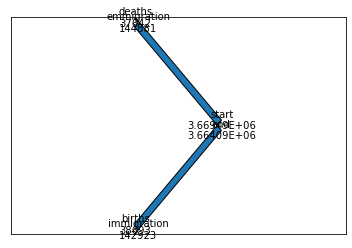

In [212]:
sankey = Sankey()  # init
sankey.add(flows=flows, labels=labels)  # add flow(s)
sankey.finish()  # create
plt.show()  # show

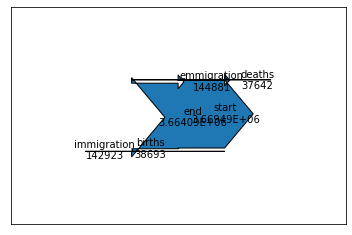

In [213]:
scale = 0.0000001
sankey = Sankey(scale=scale)  # init with scale!
sankey.add(flows=flows, labels=labels)
sankey.finish()
plt.show()

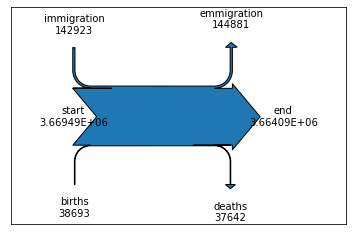

In [214]:
sankey = Sankey(scale=scale)

# 0 (inputs from the left, outputs to the right),
# 1 (from and to the top) or -1 (from and to the bottom).
orientations = [0, -1, 1, -1, 1, 0]

# add flow(s) with orientations
sankey.add(flows=flows, labels=labels, orientations=orientations)
sankey.finish()
plt.show()

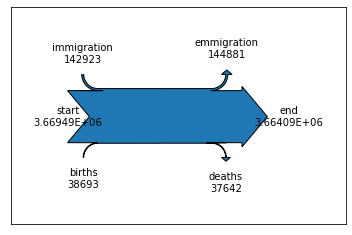

In [221]:
pathlengths=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

sankey = Sankey(scale=scale)
sankey.add(
    flows=flows, labels=labels,
    orientations=orientations,
    pathlengths=pathlengths,
)  # add flow(s) with orientations and pathlengths
sankey.finish()
plt.show()


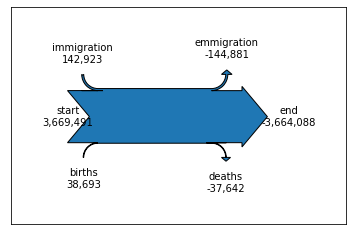

In [223]:
def format_number(n):
    return '{:,}'.format(n)  # add thousand separator

# add number format
sankey = Sankey(scale=scale, format=format_number)
sankey.add(
    flows=flows, labels=labels,
    orientations=orientations,
    pathlengths=pathlengths,   
)
sankey.finish()
plt.show()


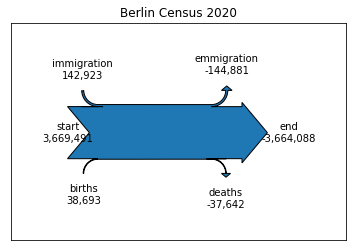

In [228]:
sankey = Sankey(scale=scale, format=format_number)
sankey.add(
    flows=flows, labels=labels,
    orientations=orientations,
    pathlengths=pathlengths,   
)
sankey.finish()
plt.title("Berlin Census 2020")  # add title
plt.show()


In [258]:
# add second year
data = {
    '2019': {
        'start 2019': 3644826,
        'births': 39503,
        'immigration': 184744,
        'deaths': -34739,
        'emmigration': -161513,
        'end 2019': -3669491
    },
    '2020': {
        'start 2020': 3669491,
        'births': 38693,
        'immigration': 142923,
        'deaths': -37642,
        'emmigration': -144881,
        'end 2020': -3664088
    }
}

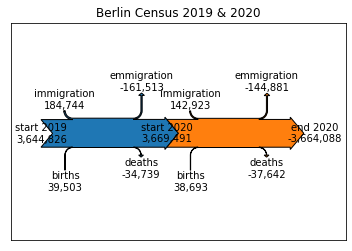

In [259]:
flows_2019 = list(data['2019'].values())
labels_2019 = list(data['2019'].keys())
labels_2019[-1] = None  # remove last label
flows_2020 = list(data['2020'].values())
labels_2020 = list(data['2020'].keys())

pathlengths=[0.3, 0.3, 0.1, 0.1, 0.3, 0.3]


sankey = Sankey(scale=scale, format=format_number)
sankey.add(
    flows=flows_2019, labels=labels_2019,
    orientations=orientations,
    pathlengths=pathlengths,   
)
sankey.add(
    flows=flows_2020, labels=labels_2020,
    orientations=orientations,
    pathlengths=pathlengths,
    prior=0, connect=(5, 0)
)
sankey.finish()
plt.title("Berlin Census 2019 & 2020")  # add title
plt.show()

## Example Code



## matplotlib
* https://matplotlib.org/stable/gallery/specialty_plots/sankey_basics.html
* `scale` argument for large/small numbers
* `format` difficult to handle
* do everything explicitly
* good (but long) documentation

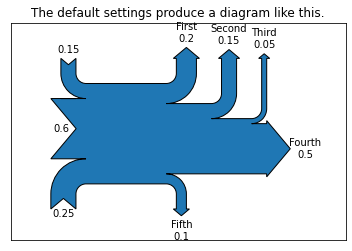

In [3]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.show()

## Pitfalls
## Pros & Cons

* DB
* transport
  * goods
  * commuting
* housing/rent
* food
* berlin
  * population: births, deaths, immigration, emigration

Bahnstrommix
2021 / 2020
Erneuerbare Energien: 62,4 / 61,4
Kernenergie 10,7 / 12,0
Steinkohle 13,9 / 11,2
Braunkohle 6,4 / 7,0
Erdgas 6,3 / 8,1
Sonstige 0,3 / 0,3

Source:
https://www.deutschebahn.com/resource/blob/7537090/2399eacea035e260cd9838b0cfd0c0e6/Kennzahlen2021-data.pdf
page 67

ERNEUERBARE ENERGIEN 1)
2021 62,4
2020 61,4
2019 60,1
KERNENERGIE
2021 10,7
2020 12,0
2019 10,0
STEINKOHLE
2021 13,9
2020 11,2
2019 14,0
BRAUNKOHLE
2021 6,4
2020 7,0
2019 6,4
ERDGAS
2021 6,3
2020 8,1
2019 9,0
SONSTIGE
2021 0,3
2020 0,3
2019 0,5

https://www.deutschebahn.com/resource/blob/7537106/7d38dfcb4de528171002c09ae29ba705/DuF2021-data.pdf
page 15

ERNEUERBARE ENERGIEN 1)
2020 61,4
2019 60,1
2018 57,2
KERNENERGIE
2020 12,0
2019 10,0
2018 9,6
STEINKOHLE
2020 11,2
2019 14,0
2018 18,7
BRAUNKOHLE
2020 7,0
2019 6,4
2018 5,7
ERDGAS
2020 8,1
2019 9,0
2018 8,3
SONSTIGE
2020 0,3
2019 0,5
2018 0,5

https://kpi.deutschebahn.com/fileadmin/Downloads/2020/DB20_DuF_d_web_01.pdf
page 15

# Do's and Don'ts

## Do
* ...

<img width="800" src="img/minard_1869.png"/>

<font size="1">https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png</font>

## Don't


# Sources and links to more material


* https://towardsdatascience.com/the-what-why-and-how-of-sankey-diagrams-430cbd4980b5
* 

Portraits and pictures w/o caption downloaded at https://commons.wikimedia.org/

## General
* ...


## Python Libraries
* ...